In [18]:
# https://github.com/fchollet/ARC-AGI?tab=readme-ov-file
# https://arcprize.org/
# https://www.kaggle.com/competitions/arc-prize-2024/code?competitionId=67357&sortBy=voteCount&excludeNonAccessedDatasources=true
# https://arxiv.org/pdf/1911.01547
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from   matplotlib import colors
import seaborn as sns

import json
import os
from pathlib import Path

from subprocess import Popen, PIPE, STDOUT
from glob import glob

import torch

In [19]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

# Data Import

In [20]:
base_path='../data/'
# Loading JSON data
def load_json(file_path):
    data = {};
    for file in glob(file_path+ "*.json"):
        with open(file) as f:
            file_name = os.path.basename(file).split(".json")[0]
            data[file_name] = json.load(f)
    return data

In [21]:
# Reading files
training_challenges =  load_json(base_path +'training/')
training_solutions =   load_json(base_path +'evaluation/')

In [22]:
list(training_challenges)[0]

'2dc579da'

# Visualization of Data

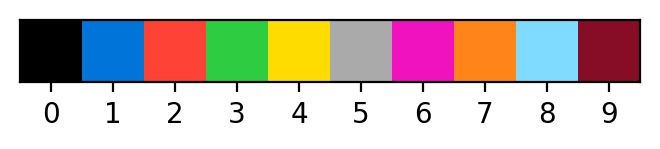

In [23]:
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow, # 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
_cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

plt.figure(figsize=(4, 1), dpi=200)
plt.imshow([list(range(10))], cmap=_cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

In [24]:
def plot_grid(axs, mat, train_or_test, input_or_output):
    input_grid_size = mat.shape
    axs.set_yticks([x-0.5 for x in range(1+input_grid_size[0])])
    axs.set_xticks([x-0.5 for x in range(1+input_grid_size[1])])
    axs.grid(True,which='both',color='lightgrey', linewidth=0.5)
    axs.imshow(mat, cmap=_cmap, norm=norm)
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    axs.set_title(train_or_test + ' '+input_or_output)
    
def plot_task(task):
    num_train = len(task['train'])
    fig, axs = plt.subplots(2, num_train, figsize=(3 * num_train, 3 * 2))
    for i in range(num_train):
        inn = np.array(task["train"][i]["input"])
        out = np.array(task["train"][i]["output"])
        plot_grid(axs[0, i], inn, "Train", "Input")
        plot_grid(axs[1, i], out, "Train", "Output")
    plt.tight_layout()
    plt.show()

Set #0, 2dc579da


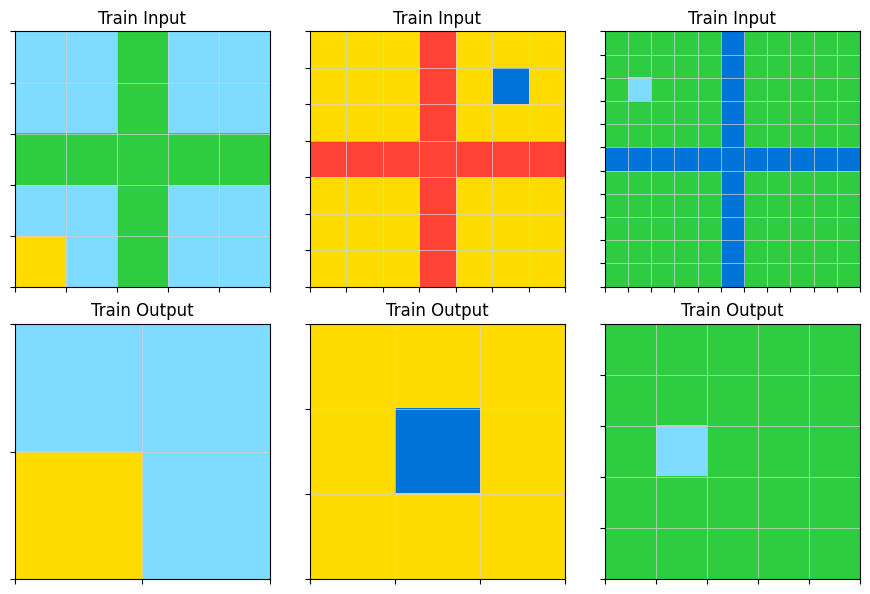

In [25]:
for i in range(1):
    t = list(training_challenges)[i]
    task= training_challenges[t]
    print(f'Set #{i}, {t}')
    plot_task(task)